# 투빅스 16기 정규세션 Week1 EDA - 16기 김주호

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

In [184]:
data = pd.read_csv(r"C:\tobigs_data\assignment_data.csv", encoding="UTF8")

# 1. Data Set Description

a dataset of IBM employee attrition data. Each row is personal and attrition information of an employee. 


1. Age : **해당 직원의 나이**
2. Attrition : **퇴직 여부 Target값 (종속변수)**
3. BusinessTravel : **출장의 빈도**
4. DailyRate : **일 대비 급여의 수준**
5. Department : **업무분야**
6. DistanceFromHome : **집과의 거리**
7. Education : **교육의 정도 (1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor')**
8. EducationField : **전공**
9. EmployeeCount : **직원 숫자**
10. EmployeeNumber : **직원 ID**
11. EnvironmentSatisfaction : **업무 환경에 대한 만족도 (1 'Low' 2 'Medium' 3 'High' 4 'Very High')**
12. Gender : **성별**
13. HourlyRate : **시간 대비 급여의 수준**
14. JobInvolvement : **업무 참여도 (1 'Low' 2 'Medium' 3 'High' 4 'Very High')**
15. JobLevel : **업무의 수준**
16. JobRole : **업무 종류**
17. JobSatisfaction : **업무 만족도 (1 'Low' 2 'Medium' 3 'High' 4 'Very High')**
18. MaritalStatus : **결혼 여부**
19. MonthlyIncome : **월 소득**
20. MonthlyRate : **월 대비 급여 수준**
21. NumCompaniesWorked : **일한 회사의 수**
22. Over18 : **18세 이상**
23. OverTime : **규정외 노동시간**
24. PercentSalaryHike : **급여의 증가분 백분율**
25. PerformanceRating : **업무 성과 (1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding')**
26. RelationshipSatisfaction : **대인관계 만족도 (1 'Low' 2 'Medium' 3 'High' 4 'Very High')**
27. StandardHours : **표준 시간**
28. StockOptionLevel : **스톡옵션 정도**
29. TotalWorkingYears : **경력 기간**
30. TrainingTimesLastYear : **교육 시간**
31. WorkLifeBalance : **일과 생활의 균형 정도 (1 'Bad' 2 'Good' 3 'Better' 4 'Best')**
32. YearsAtCompany : **근속 연수**
33. YearsInCurrentRole : **현재 역할의 년수**
34. YearsSinceLastPromotion : **마지막 프로모션**
35. YearsWithCurrManager : **현재 관리자와 함께 보낸 시간**




In [185]:
data.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [187]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# 2. EDA

In [188]:
data.shape

(1470, 35)

In [189]:
# 결측치 없음
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- **분산이 0인 수치형 변수 열 삭제**

In [190]:
import numpy as np

for col in data.columns:
    if (data[col].dtype==np.int64 and data[col].std()==0):
        print(col)

EmployeeCount
StandardHours


In [191]:
data.drop(['EmployeeCount','StandardHours'],axis=1,inplace=True)

- **문자형 변수 탐색 및 문자형 변수 중 범주가 하나인 열 삭제**

In [192]:
import numpy as np
import pandas as pd

df=pd.DataFrame(data.dtypes=='object')
print(df,'\n'*2)

for obj in df[df[0]==True].index.tolist():
    print(obj,'범주의 수:',len(np.unique(data[obj])),'\n',np.unique(data[obj]),'\n')

                              0
Age                       False
Attrition                  True
BusinessTravel             True
DailyRate                 False
Department                 True
DistanceFromHome          False
Education                 False
EducationField             True
EmployeeNumber            False
EnvironmentSatisfaction   False
Gender                     True
HourlyRate                False
JobInvolvement            False
JobLevel                  False
JobRole                    True
JobSatisfaction           False
MaritalStatus              True
MonthlyIncome             False
MonthlyRate               False
NumCompaniesWorked        False
Over18                     True
OverTime                   True
PercentSalaryHike         False
PerformanceRating         False
RelationshipSatisfaction  False
StockOptionLevel          False
TotalWorkingYears         False
TrainingTimesLastYear     False
WorkLifeBalance           False
YearsAtCompany            False
YearsInC

In [193]:
# Over18 변수는 데이터가 오직 하나이므로 열 삭제(수치형 변수로는 분산이 0인 셈)
data.drop('Over18',axis=1,inplace=True)

In [194]:
# EmployeeCount 변수는 직원 ID에 해당하므로 삭제
data.drop('EmployeeNumber',axis=1,inplace=True)

In [195]:
# DailyRate, HourlyRate, MonthlyRate 의미가 모호한 세가지 변수는 분석에서 제외
data.drop(['HourlyRate','MonthlyRate','DailyRate'],axis=1,inplace=True)

- **분산이 0인 수치형 변수 2개, 직원ID 변수(수치형 변수) 1개, 단일 범주형 변수 1개, 의미 모호한 변수 3개, 총 7개 컬럼 삭제**

In [196]:
data.shape

(1470, 28)

In [197]:
data.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- **타겟변수 0,1로 바꿔주기**

In [198]:
data['Attrition'].replace('Yes',1,inplace=True)
data['Attrition'].replace('No',0,inplace=True)
data.Attrition.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

## 2-1. 수치형 변수간 상관관계 파악

In [199]:
data.corr()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,-0.001686,0.208034,0.010146,0.029820,0.509604,-0.004892,0.497855,0.299635,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.077924,-0.031373,-0.103369,-0.130016,-0.169105,-0.103481,-0.159840,0.043494,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DistanceFromHome,-0.001686,0.077924,1.000000,0.021042,-0.016075,0.008783,0.005303,-0.003669,-0.017014,-0.029251,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.021042,1.000000,-0.027128,0.042438,0.101589,-0.011296,0.094961,0.126317,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,-0.016075,-0.027128,1.000000,-0.008278,0.001212,-0.006784,-0.006259,0.012594,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
JobInvolvement,0.029820,-0.130016,0.008783,0.042438,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,0.015012,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.005303,0.101589,0.001212,-0.012630,1.000000,-0.001944,0.950300,0.142501,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,-0.003669,-0.011296,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,-0.055699,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,-0.159840,-0.017014,0.094961,-0.006259,-0.015271,0.950300,-0.007157,1.000000,0.149515,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079
NumCompaniesWorked,0.299635,0.043494,-0.029251,0.126317,0.012594,0.015012,0.142501,-0.055699,0.149515,1.000000,...,-0.014095,0.052733,0.030075,0.237639,-0.066054,-0.008366,-0.118421,-0.090754,-0.036814,-0.110319


<AxesSubplot:>

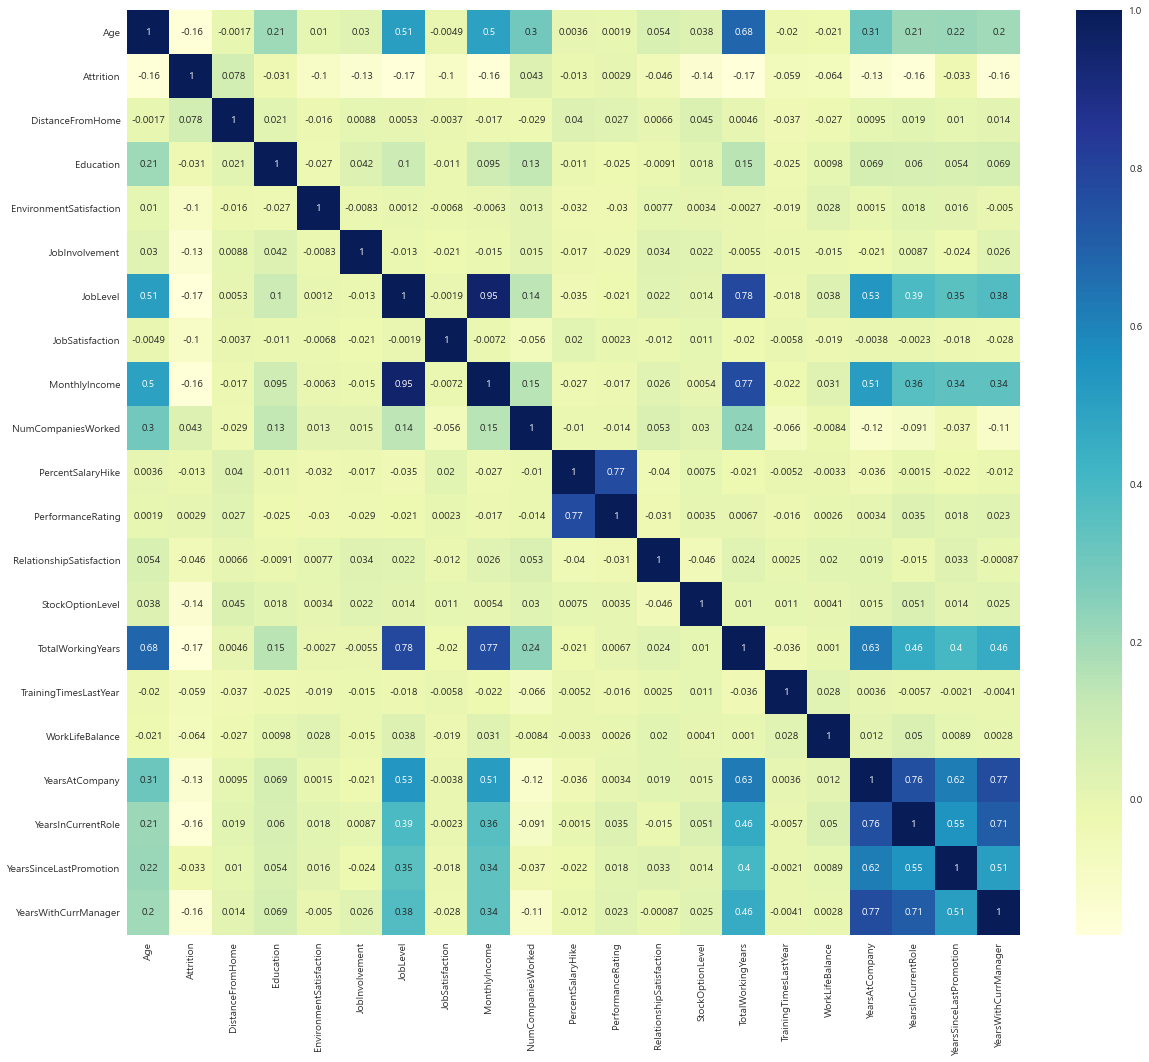

In [200]:
import seaborn as sns
plt.figure(figsize=(20,17))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)

- 우선 MonthlyIncome을 보았을 때, 나이, 근속연수, 경력기간이 각각 0.5, 0.51, 0.77로 강한 양의 상관성이 있으며 JobLevel(업무수준)과 0.95의 매우 높은 상관성을 띠는 것으로 보아 **IBM은 어느정도 호봉제의 특성을 지녔으며 임금설정의 가장 중요한 척도는 업무수준임**을 알 수 있다. 또한 교육의 정도나 업무성과에 따라 임금이 높을 것이라 예상했지만 0.095, -0.017로 상관도가 상당히 낮음을 알 수 있다.


- 하지만 업무성과와 급여의 증가율이 0.77로 강한 상관도를 지니는 것으로 보아 **업무성과는 임금 자체보다는 임금의 증가율에 영향을 미치는 것**을 알 수 있으며, **성과에 따른 즉각적 보상**이 제대로 이루어지고 있음을 알 수 있다. 교육의 정도는 다른 변수와 큰 상관성이 없는 것을 확인할 수 있는데 이는 **기술컨설팅 업종의 특성상 학위보다는 경력이 인정되는 분야임을 추측**해볼 수 있다.


- 다만, JobSatisfaction과 WorkLifeBalance, MonthlyIncome의 상관성이 낮은 것은 다소 의문이 드는 부분이다.-> 시각화를 통해 확인해보니 워라밸


- 타겟 변수인 Attrition은 다른 변수들과 뚜렷한 상관도를 보이지 않고 있어 **다양한 시각화**를 통해 어떤 변수가 타겟변수에 영향을 미치는지 확인해봐야 할 것으로 보인다.

## 2-2. 로그변환 및 이상치 제거

- **각 수치형 변수별 히스토그램을 출력하여 분포도 확인**

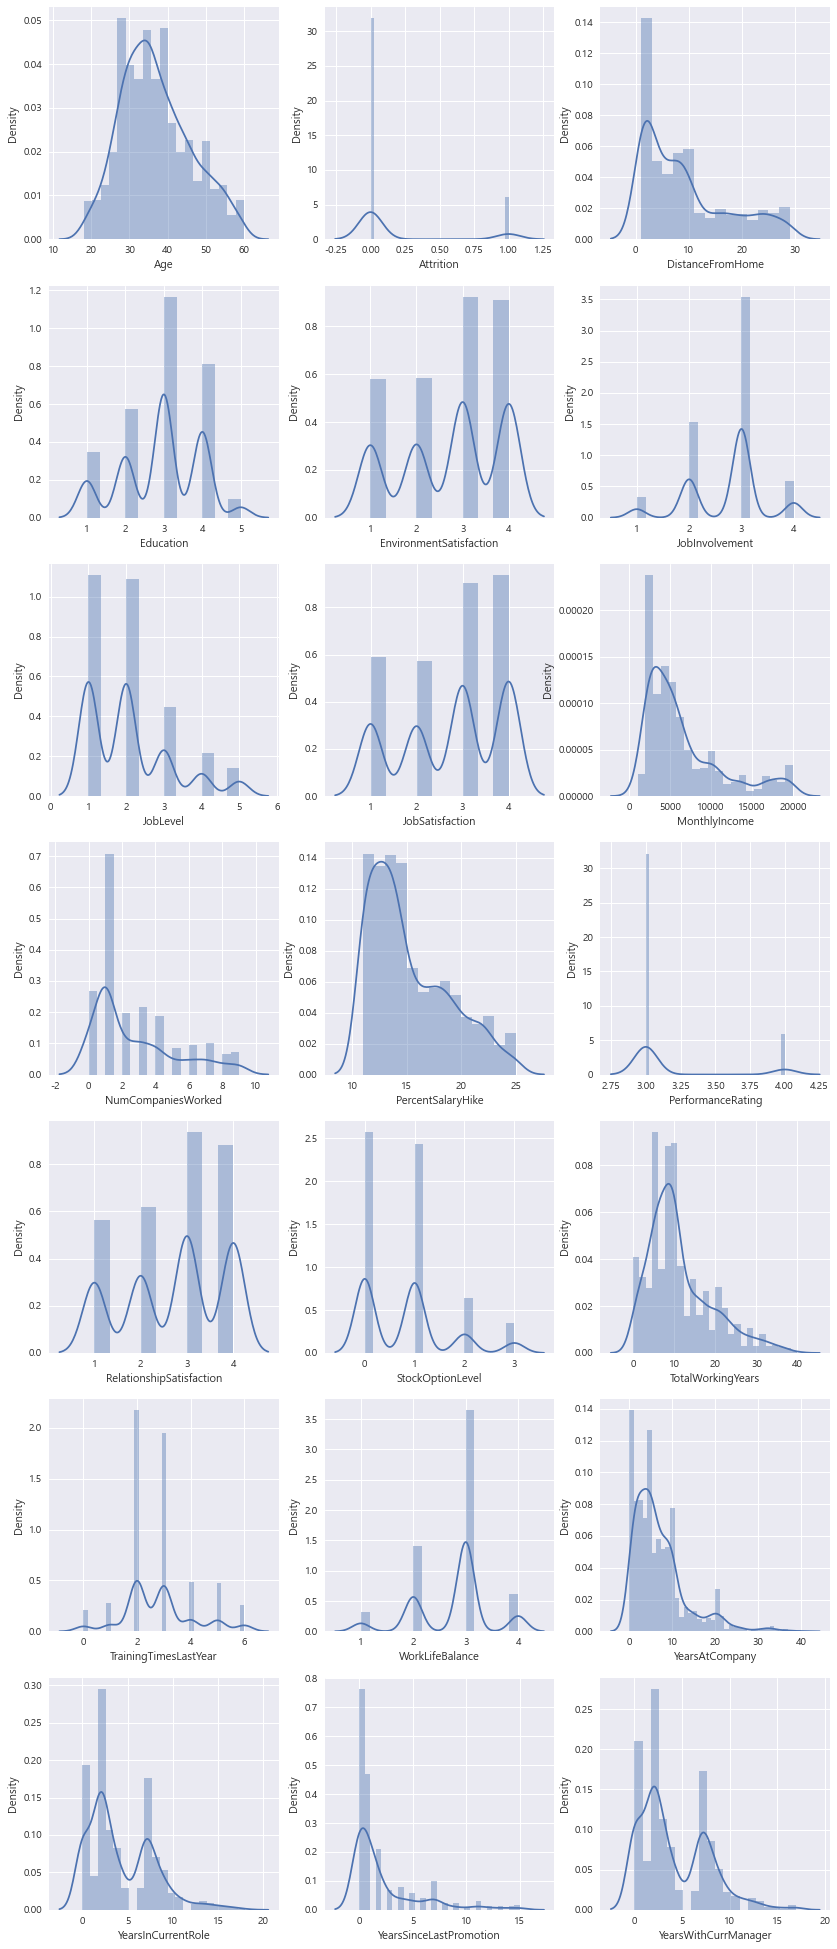

In [201]:
fig, ax=plt.subplots(figsize=(14,35),nrows=7,ncols=3)
df=pd.DataFrame(data.dtypes=='int64')

ax = ax.flatten()

for i,col in enumerate(df[df[0]==True].index):
    sns.distplot(data[col],ax=ax[i])
plt.show()

- 퇴직에 영향을 미칠 것이라고 예상되는 변수 중 치우친 연속형 변수에 대해 로그변환 적용


- 해당 변수: 'MonthlyIncome', 'DistanceFromHome', 'PercentSalaryHike', 'YearsAtCompany', 'YearsSinceLastPromotion', 'Age', 'NumCompaniesWorked', 'TotalWorkingYears'

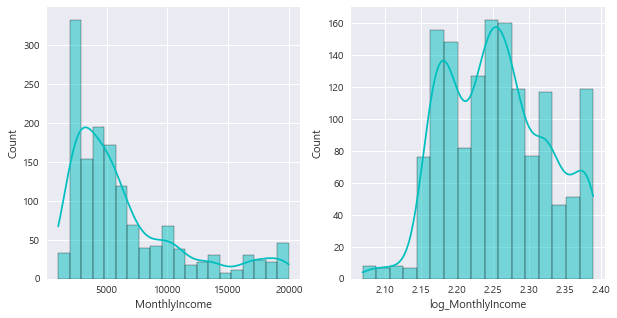

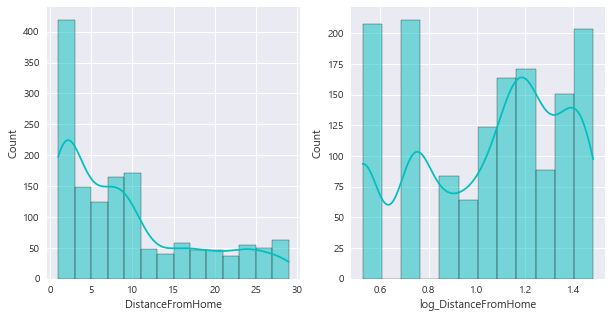

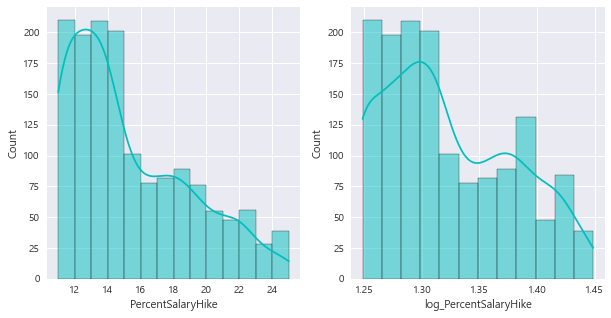

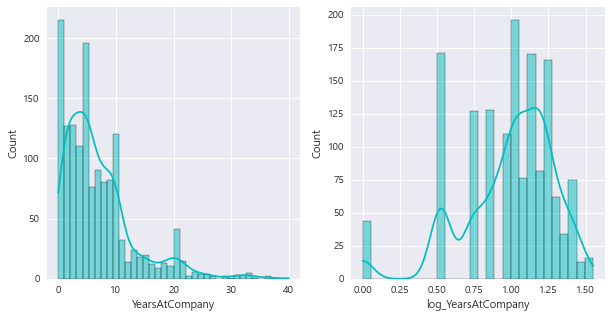

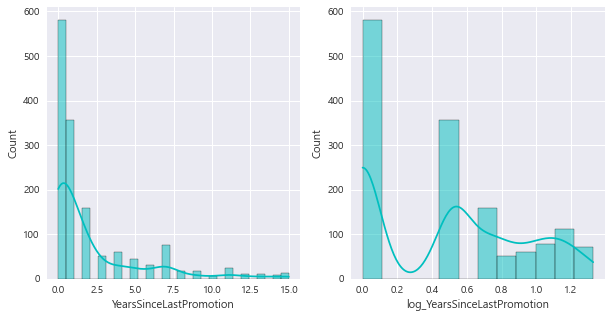

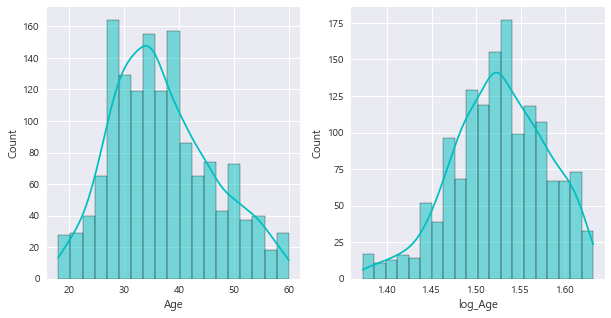

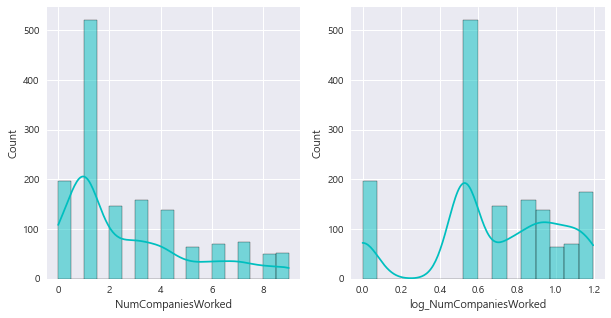

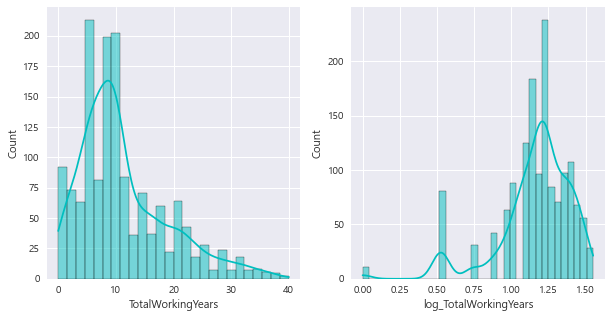

In [202]:
## data_1로 복사하여 여러 변수에 로그변환 시도
data_1=data.copy()
col_list=['MonthlyIncome','DistanceFromHome','PercentSalaryHike','YearsAtCompany','YearsSinceLastPromotion','Age',
          'NumCompaniesWorked','TotalWorkingYears']
for col in col_list:
    data_1['log_'+col]=np.log1p(data_1[col]) # 0을 가진 변수도 로그변환이 가능하도록 log1p()사용
    f,axes=plt.subplots(ncols=2,figsize=(10,5))
    sns.histplot(data[col],ax=axes[0],color='c',kde=True,)
    sns.histplot(np.log1p(data_1['log_'+col]), ax=axes[1],color='c',kde=True)
    plt.show()

- **로그변환 후 다시 상관계수 히트맵 시각화**

<AxesSubplot:>

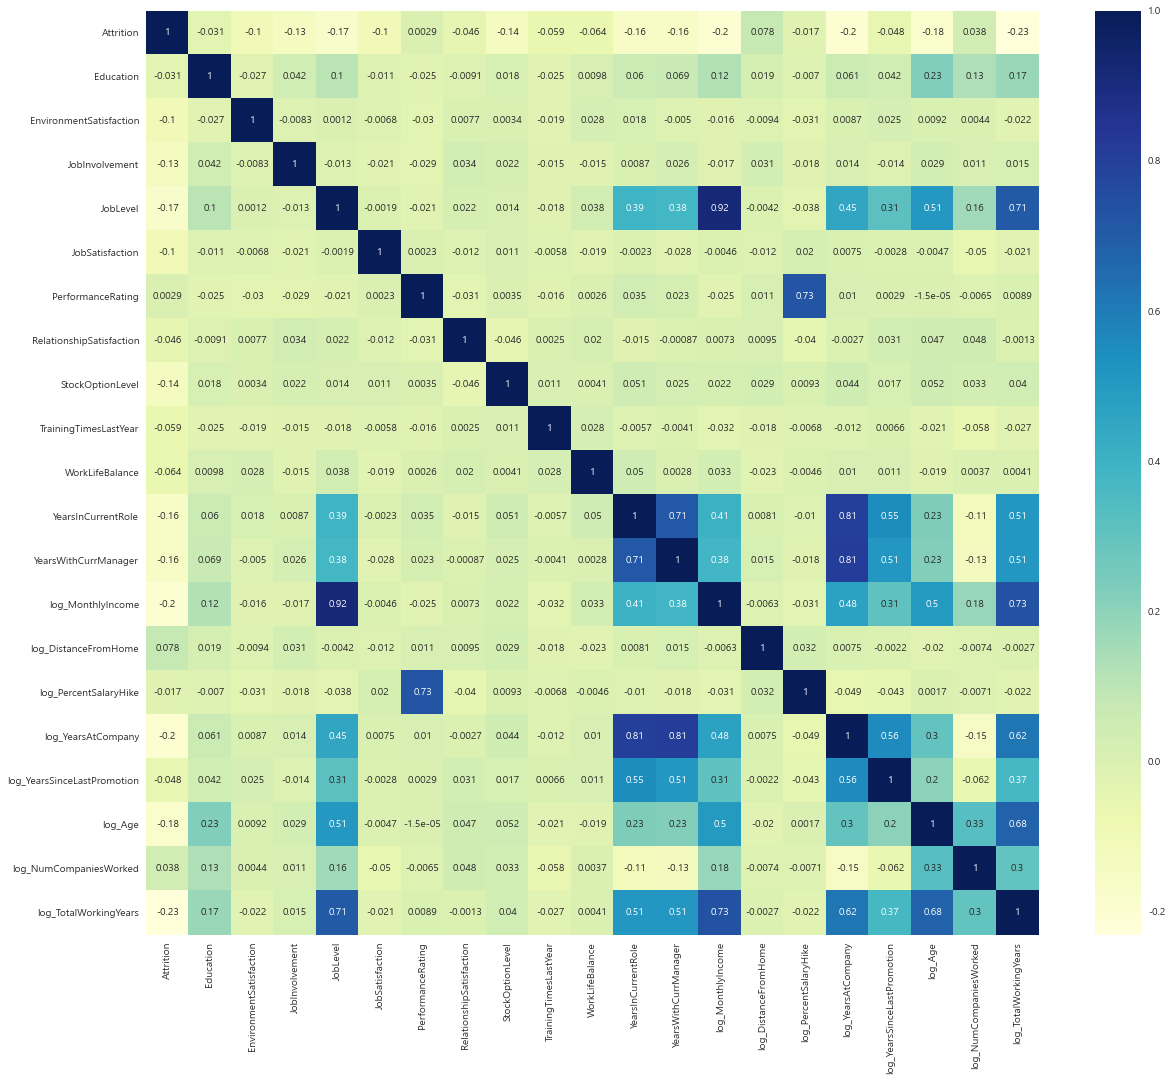

In [203]:
import seaborn as sns

# log변환 전 변수들은 제거
data_1.drop(col_list,axis=1,inplace=True)

plt.figure(figsize=(20,17))
sns.heatmap(data_1.corr(),cmap='YlGnBu',annot=True)

- 로그변환 후 히트맵을 살펴보면 이전보다 Attrition 타겟변수와 약하게나마 음의 상관성을 띠는 변수들이 보인다. **총 경력기간이 짧을 수록, 나이가 적을 수록, IBM 근속연수가 짧을 수록, 월급이 적을 수록 퇴직(or 이직)하는 사람들이 많아짐**을 확인할 수 있다. 또한, 강한 상관성을 띠는 변수가 나타나지 않은 것은 이직이나 퇴직의 사유가 다양한 원인에서 기인할 수 있기 때문이라고 추측해볼 수 있다.

# 3. 시각화를 통한 변수간 관계 탐색

In [206]:
# 범주형 자료 확인을 위해 위 코드 복사
import numpy as np
import pandas as pd

df=pd.DataFrame(data.dtypes=='object')

for obj in df[df[0]==True].index.tolist():
    print(obj,'범주의 수:',len(np.unique(data[obj])),'\n',np.unique(data[obj]),'\n')

# data_1을 다시 data로 이름변경
data=data_1

BusinessTravel 범주의 수: 3 
 ['Non-Travel' 'Travel_Frequently' 'Travel_Rarely'] 

Department 범주의 수: 3 
 ['Human Resources' 'Research & Development' 'Sales'] 

EducationField 범주의 수: 6 
 ['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree'] 

Gender 범주의 수: 2 
 ['Female' 'Male'] 

JobRole 범주의 수: 9 
 ['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative'] 

MaritalStatus 범주의 수: 3 
 ['Divorced' 'Married' 'Single'] 

OverTime 범주의 수: 2 
 ['No' 'Yes'] 



## 3-1. 업무 분야별 퇴사율 비교

<AxesSubplot:xlabel='Department', ylabel='count'>

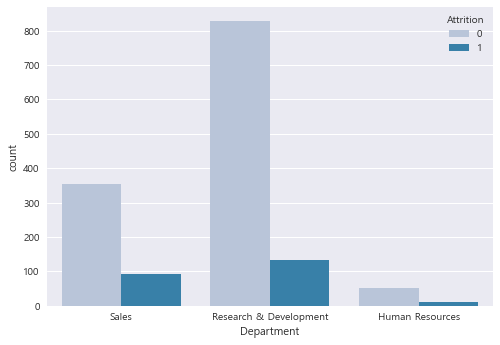

In [354]:
import seaborn as sns
sns.countplot(x='Department',hue='Attrition',palette='PuBu',dodge=True,data=data)

- countplot()을 통해 각 부서별 퇴직 유무를 시각화함. 각 부서별 인원이 다르기에 인원을 반영한 퇴사율 시각화가 필요해보임.

Research & Development    13.839750
Sales                     20.627803
Human Resources           19.047619
Name: Department, dtype: float64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


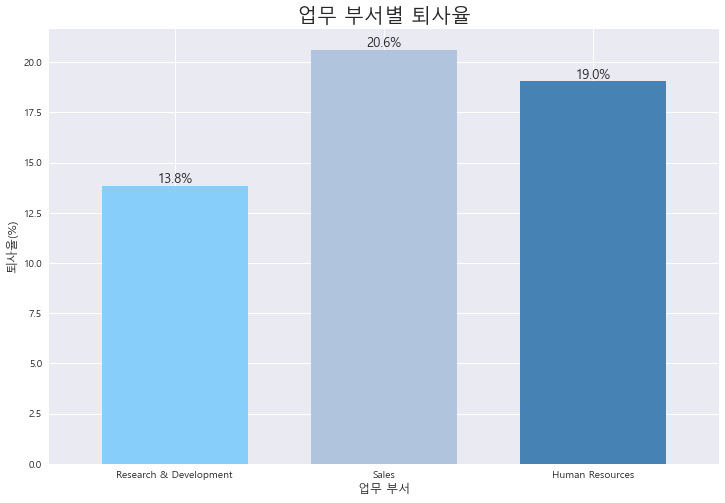

In [376]:
DA=data[data['Attrition']==1]['Department'].value_counts()
total_d=data['Department'].value_counts()

depart_A_ratio=DA/total_d*100
sr_DA=depart_A_ratio
print(sr_DA)
print(total_d)

# 업무 부서별 퇴직률 시각화
ax=sr_DA.plot(kind='bar',width=0.7,color=['lightskyblue','lightsteelblue','steelblue'],figsize=(12,8))
ax.set_title('업무 부서별 퇴사율',size=20)
ax.set_xticklabels(sr_DA.index,rotation=0)
ax.set_xlabel('업무 부서',fontsize=12)
ax.set_ylabel('퇴사율(%)',size='large')

for i in range(3):
    plt.text(i, sr_DA[i], "%0.1f%%"%sr_DA[i], fontsize = 13, horizontalalignment='center', verticalalignment='bottom')

- 업무 부서 중 **'Sales' 부서의 퇴사율이 20.6%로 가장 높은 것**을 확인할 수 있으며 **'Research&Development' 부서의 퇴사율이 13.8%로 가장 낮은 것**을 확인할 수 있다.


- 임금이나 업무 및 업무 환경, 인간관계에 대한 만족도, 초과근무 여부를 부서별로 분석하여 퇴사율 차이가 나타나는 이유를 알아보도록 한다.

In [220]:
# OverTime변수 원핫인코딩하여 밑에 데이터프레임 만드는 데에 사용
import pandas as pd
data_ohe=pd.get_dummies(data,columns=['OverTime'])
data_ohe.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'log_MonthlyIncome', 'log_DistanceFromHome',
       'log_PercentSalaryHike', 'log_YearsAtCompany',
       'log_YearsSinceLastPromotion', 'log_Age', 'log_NumCompaniesWorked',
       'log_TotalWorkingYears', 'OverTime_No', 'OverTime_Yes'],
      dtype='object')

In [385]:
data_ohe[['Attrition','Department','EnvironmentSatisfaction','log_MonthlyIncome','JobSatisfaction',
          'WorkLifeBalance','OverTime_No','RelationshipSatisfaction']].groupby('Department').mean()

,Attrition,EnvironmentSatisfaction,log_MonthlyIncome,JobSatisfaction,WorkLifeBalance,OverTime_No,RelationshipSatisfaction
Department,,,,,,,
Human Resources,0.190476,2.682540,8.490352,2.603175,2.920635,0.730159,2.888889
Research & Development,0.138398,2.744017,8.493956,2.726327,2.725286,0.718002,2.708637
Sales,0.206278,2.679372,8.688253,2.751121,2.816143,0.713004,2.695067


- 부서별 퇴사율을 가장 잘 설명하는 것은 업무 환경에 대한 만족도 지표로 보임.

## 3-2. 규정 외 노동 유무에 따른 퇴사율 비교

Yes    30.528846
No     10.436433
Name: OverTime, dtype: float64
Yes     416
No     1054
Name: OverTime, dtype: int64


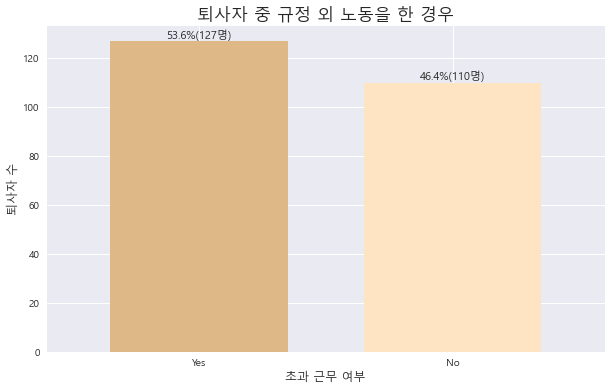

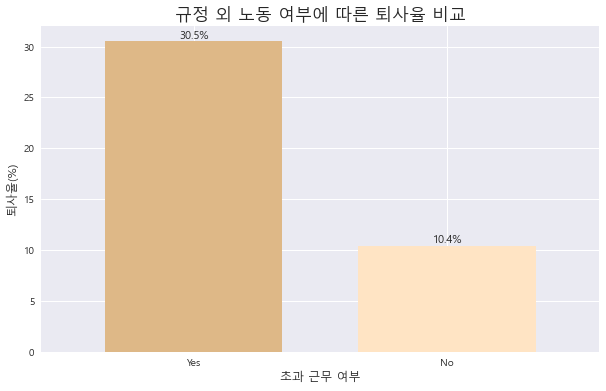

In [373]:
otA=data[data['Attrition']==1]['OverTime'].value_counts()
total_ot=data['OverTime'].value_counts()

overT_A_ratio=otA/total_ot*100
sr_ot=overT_A_ratio.reindex(index=['Yes','No'])
print(sr_ot)
print(total_ot.reindex(index=['Yes','No']))

# 규정 외 노동 유무에 따른 퇴사자 및 퇴사율 시각화

axes[0]=otA.plot(kind='bar',width=0.7,color=['burlywood','bisque'],figsize=(10,6))
axes[0].set_title('퇴사자 중 규정 외 노동을 한 경우',size=17)
axes[0].set_xticklabels(otA.index,rotation=0)
axes[0].set_xlabel('초과 근무 여부',fontsize=12)
axes[0].set_ylabel('퇴사자 수',size='large')

for i in range(2):
    axes[0].text(i, otA[i], "%0.1f%%"%(otA[i]/237*100)+"(%0.0f명)"%otA[i], fontsize = 11, horizontalalignment='center', verticalalignment='bottom')

plt.show()

axes[1]=sr_ot.plot(kind='bar',width=0.7,color=['burlywood','bisque'],figsize=(10,6))
axes[1].set_title('규정 외 노동 여부에 따른 퇴사율 비교',size=17)
axes[1].set_xticklabels(sr_ot.index,rotation=0)
axes[1].set_xlabel('초과 근무 여부',fontsize=12)
axes[1].set_ylabel('퇴사율(%)',size='large')

for i in range(2):
    axes[1].text(i, sr_ot[i], "%0.1f%%"%sr_ot[i], fontsize = 11, horizontalalignment='center', verticalalignment='bottom') 

plt.show()

- 퇴사자 중 규정 외 노동을 한 사람이 53.6%로 퇴사에 초과근무가 어느정도 영향을 미쳤을 것이라고 예상할 수 있다.

## 3-3. 결혼 상태에 따른 퇴사율 비교

Divorced    10.091743
Married     12.481426
Single      25.531915
Name: MaritalStatus, dtype: float64
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


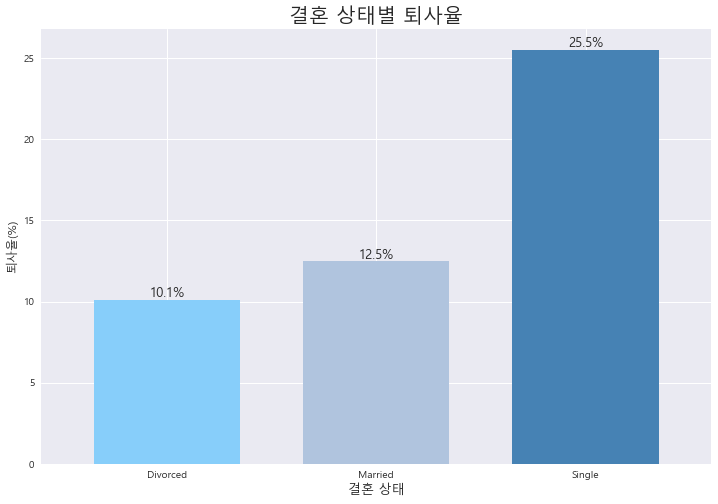

In [372]:
msA=data[data['Attrition']==1]['MaritalStatus'].value_counts()
total_ms=data['MaritalStatus'].value_counts()

marital_A_ratio=msA/total_ms*100
sr_msA=marital_A_ratio
print(sr_msA)
print(total_ms)

# 결혼 상태별 퇴사율 시각화
ax=sr_msA.plot(kind='bar',width=0.7,color=['lightskyblue','lightsteelblue','steelblue'],figsize=(12,8))
ax.set_title('결혼 상태별 퇴사율',size=20)
ax.set_xticklabels(sr_msA.index,rotation=0)
ax.set_xlabel('결혼 상태',fontsize=13)
ax.set_ylabel('퇴사율(%)',size='large')

for i in range(3):
    plt.text(i, sr_msA[i], "%0.1f%%"%sr_msA[i], fontsize = 13, horizontalalignment='center', verticalalignment='bottom')

- 결혼 상태별 퇴사율을 살펴보면 **미혼인 경우, 기혼인 경우보다 퇴사율이 2배 이상 높은 것**을 확인할 수 있다. 또한, 의외로 **이혼자의 퇴사율이 10.1%로 가장 낮다.** 퇴사의 원인이 미혼이라기보단 미혼의 경우 부양해야 할 가족이 없는 경우가 많아 퇴사가 보다 자유롭다고 해석할 수 있다.

## 3-4. 성별 퇴사율 비교

Male      17.006803
Female    14.795918
Name: Gender, dtype: float64


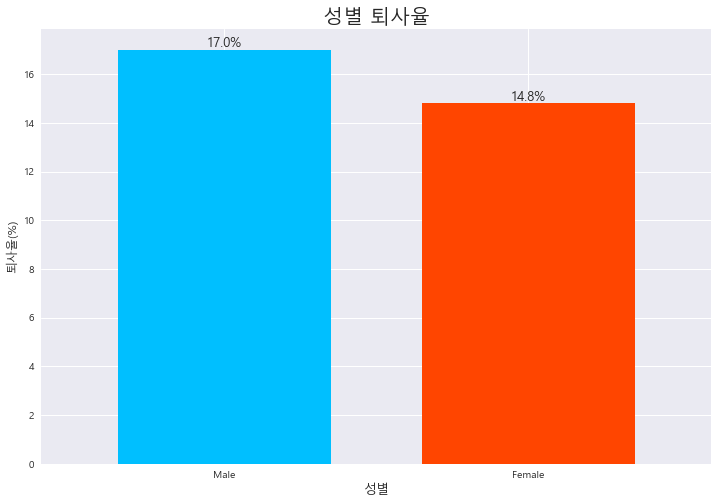

In [371]:
gA=data[data['Attrition']==1]['Gender'].value_counts()
total_g=data['Gender'].value_counts()

gender_A_ratio=gA/total_g*100
sr_gA=gender_A_ratio
print(sr_gA)

# 성별 퇴사율 시각화
ax=sr_gA.plot(kind='bar',width=0.7,color=['deepskyblue','orangered'],figsize=(12,8))
ax.set_title('성별 퇴사율',size=20)
ax.set_xticklabels(sr_gA.index,rotation=0)
ax.set_xlabel('성별',fontsize=13)
ax.set_ylabel('퇴사율(%)',size='large')

for i in range(2):
    plt.text(i, sr_gA[i], "%0.1f%%"%sr_gA[i], fontsize = 13, horizontalalignment='center', verticalalignment='bottom')

- 성별 퇴사율에서는 뚜렷한 차이가 나지는 않지만 남성의 퇴사율이 좀 더 높은 것을 확인할 수 있다

## 3-5. 출장빈도별 퇴사율 비교

Travel_Rarely        14.956855
Travel_Frequently    24.909747
Non-Travel            8.000000
Name: BusinessTravel, dtype: float64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


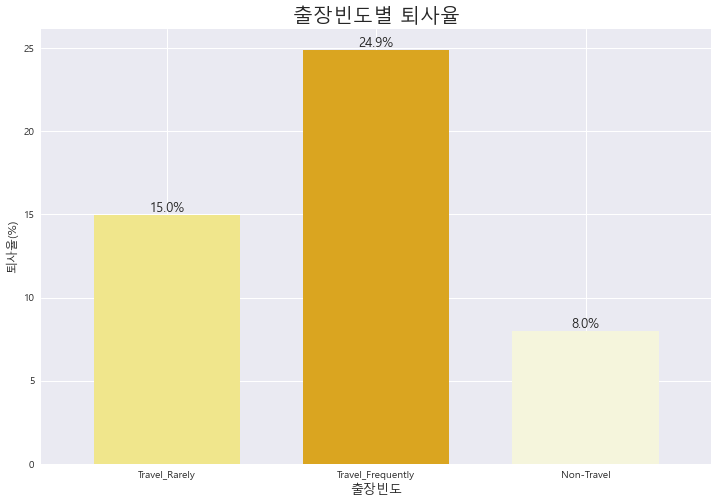

In [370]:
A=data[data['Attrition']==1]['BusinessTravel'].value_counts()
total=data['BusinessTravel'].value_counts()

sr_A=A/total*100
print(sr_A)
print(total)

# 출장빈도에 따른 퇴사율 시각화
ax=sr_A.plot(kind='bar',width=0.7,color=['khaki','goldenrod','beige'],figsize=(12,8))
ax.set_title('출장빈도별 퇴사율',size=20)
ax.set_xticklabels(sr_A.index,rotation=0)
ax.set_xlabel('출장빈도',fontsize=13)
ax.set_ylabel('퇴사율(%)',size='large')

for i in range(3):
    plt.text(i, sr_A[i], "%0.1f%%"%sr_A[i], fontsize = 13, horizontalalignment='center', verticalalignment='bottom')

- 흥미롭게도 **출장 빈도가 높을 수록 뚜렷하게 퇴사율이 높아짐**을 알 수 있다. 직원들이 해외 출장이나 장기 출장 등의 잦은 출장을 기피함을 추측할 수 있다.

# 4. 파생변수 생성

- 파생변수로 "워라밸x월급", "임금 증가율x월급", "세 만족도 변수의 곱"

In [405]:
data1=data.copy()
data1['Balance*Income']=data['WorkLifeBalance']*data['log_MonthlyIncome']
data1['SalaryHike*Income']=data['log_PercentSalaryHike']*data['log_MonthlyIncome']
data1['3_Satisfaction']=data['JobSatisfaction']*data['RelationshipSatisfaction']*data['EnvironmentSatisfaction']

<AxesSubplot:xlabel='Attrition', ylabel='Balance*Income'>

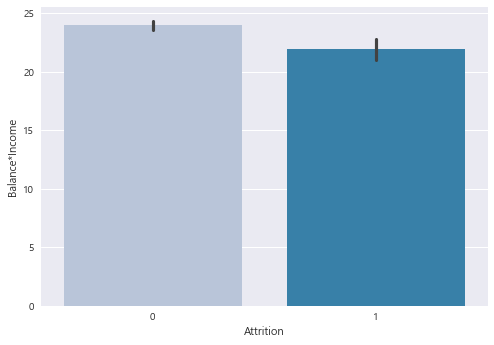

In [406]:
sns.barplot(x='Attrition',y='Balance*Income',palette='PuBu',dodge=True,data=data1)

<AxesSubplot:xlabel='Attrition', ylabel='SalaryHike*Income'>

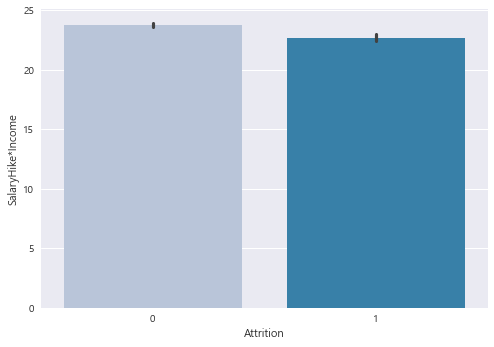

In [407]:
sns.barplot(x='Attrition',y='SalaryHike*Income',palette='PuBu',dodge=True,data=data1)

<AxesSubplot:xlabel='Attrition', ylabel='3_Satisfaction'>

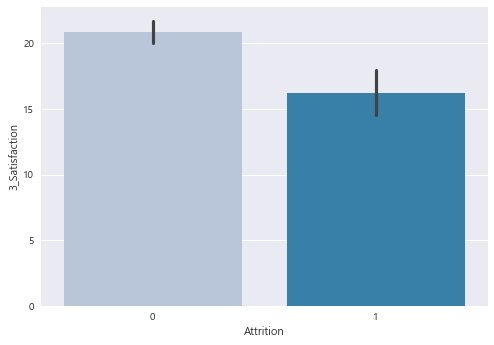

In [408]:
sns.barplot(x='Attrition',y='3_Satisfaction',palette='PuBu',dodge=True,data=data1)

- 세 파생변수 중 **만족도 관련 변수를 세개 곱한 파생변수가 가장 퇴사 여부와 관련됨**을 확인할 수 있다.

# 5. 결론 및 한계점

- 결론: EDA를 통해 실용성이 없는 변수는 삭제해주었고, 로그변환을 통해 수치형 변수간 상관성을 찾아내었다. 또한, 범주형 변수의 경우, 시각화를 통해 퇴사율을 비교하며 각 변수가 퇴사에 미치는 영향을 분석하였다. 마지막으로 3개의 파생변수를 만들어 각 파생변수가 타겟변수에 미치는 영향을 시각화하였다.

- 한계점: 대부분 비슷한 plot으로 시각화를 진행했다는 점이 아쉽다. 좀 더 다양한 시각화와 다양한 파생변수를 만들어보았다면 보다 다양한 인사이트를 얻을 수 있었을 것 같다. 또한 퇴사율 비교에서 통계적으로 확실하게 퇴사율을 계산한 것인지 확실치 않아 이 부분에 대해 더 공부해보고 싶다.